In [49]:
# importing libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#load the file
df = pd.read_csv("D:/Data Science GDG/GYM project/Dataset/gym_members_exercise_tracking.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [3]:
# get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [5]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
# knowing the data types
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [7]:
# check for missing values 
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Age,0.0
Gender,0.0
Weight (kg),0.0
Height (m),0.0
Max_BPM,0.0
Avg_BPM,0.0
Resting_BPM,0.0
Session_Duration (hours),0.0
Calories_Burned,0.0
Workout_Type,0.0


In [8]:
# looking at the relationship between gender/age and fitness
df.groupby('Gender')[['Calories_Burned', 'Max_BPM', 'BMI']].mean()
df.groupby('Age')[['Calories_Burned', 'Max_BPM', 'BMI']].mean()

,Calories_Burned,Max_BPM,BMI
Age,,,
18,962.629630,180.777778,25.454815
19,970.423077,183.884615,24.057692
20,901.320000,178.640000,26.898400
21,974.050000,177.400000,26.526000
22,985.592593,177.962963,25.596667
23,910.680000,183.520000,24.839600
24,935.133333,177.066667,21.764667
25,943.461538,181.000000,23.290769
26,926.047619,181.619048,26.133810


<Axes: xlabel='Workout_Type', ylabel='count'>

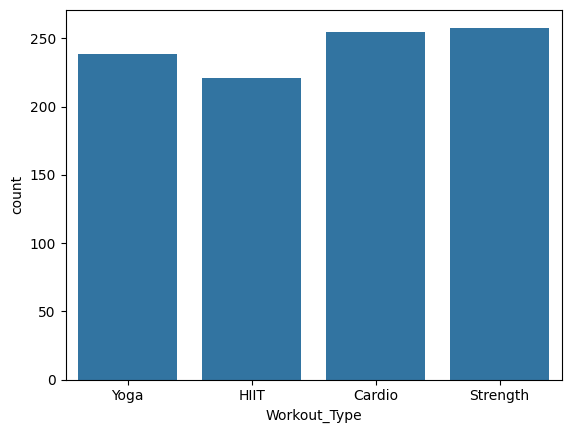

In [9]:
# knowing which workout types are most popular.
sns.countplot(x='Workout_Type', data=df)

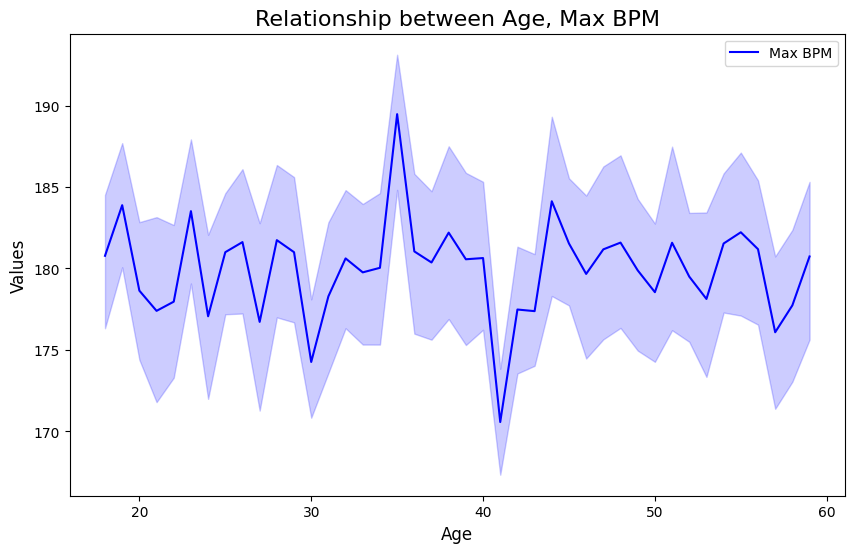

In [10]:
# Create lineplot for Max_BPM with respect to Age
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Max_BPM', label='Max BPM', color='b')
plt.title('Relationship between Age, Max BPM', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Show the plot with legend
plt.legend()
plt.show()

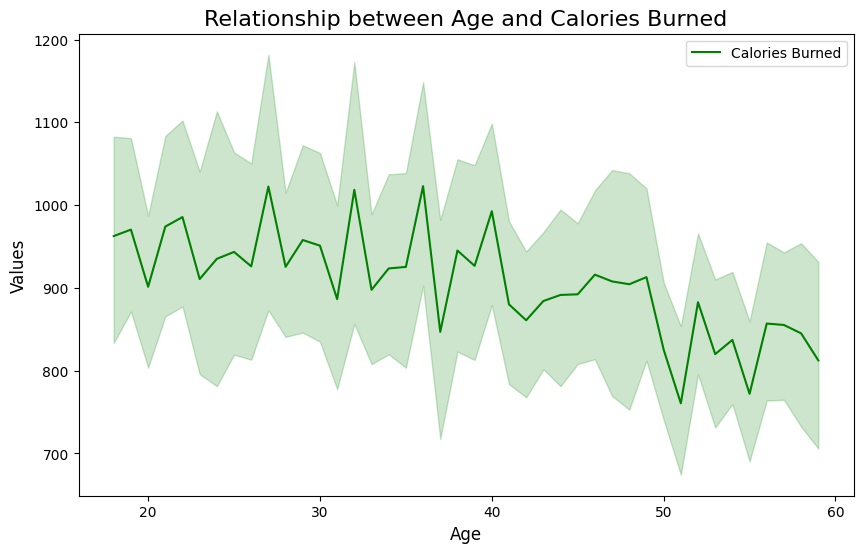

In [11]:
# Create lineplot for Calories_Burned with respect to Age
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Calories_Burned', label='Calories Burned', color='g')
plt.title('Relationship between Age and Calories Burned', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Show the plot with legend
plt.legend()
plt.show()

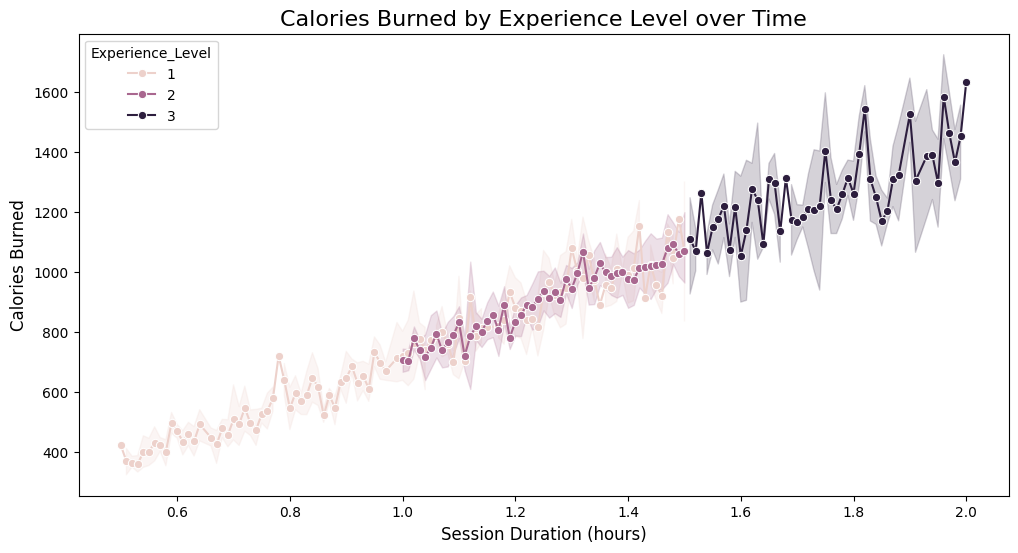

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Experience_Level', marker='o')
plt.title('Calories Burned by Experience Level over Time', fontsize=16)
plt.xlabel('Session Duration (hours)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.show()

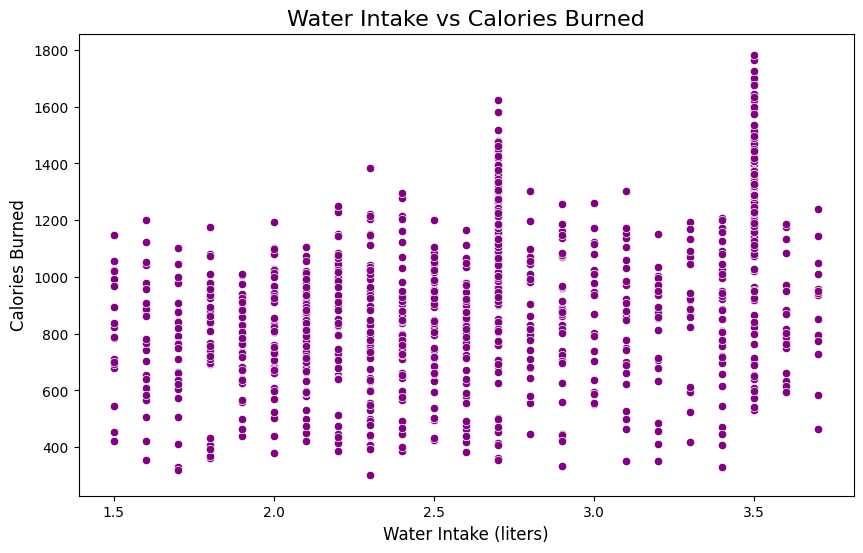

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Intake (liters)', y='Calories_Burned', data=df, color='purple')
plt.title('Water Intake vs Calories Burned', fontsize=16)
plt.xlabel('Water Intake (liters)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.show()

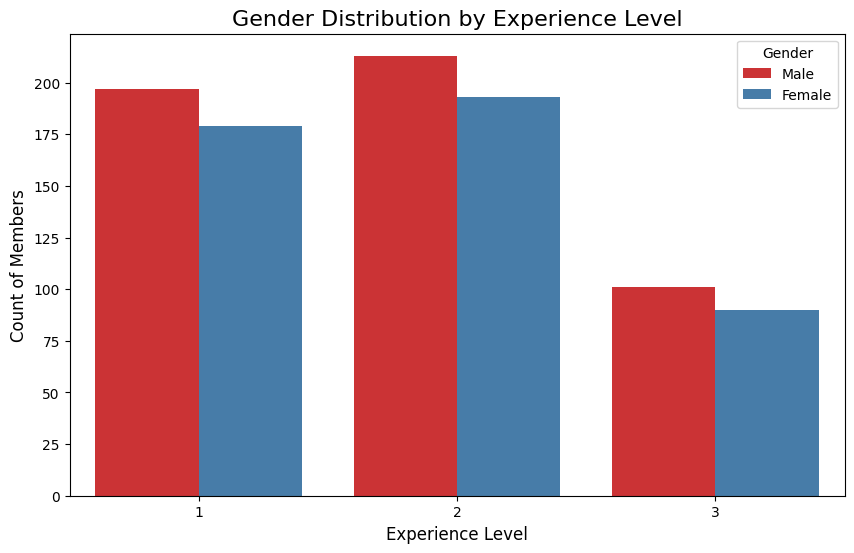

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Experience_Level', hue='Gender', palette='Set1')
plt.title('Gender Distribution by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Count of Members', fontsize=12)

# Show the plot
plt.show()

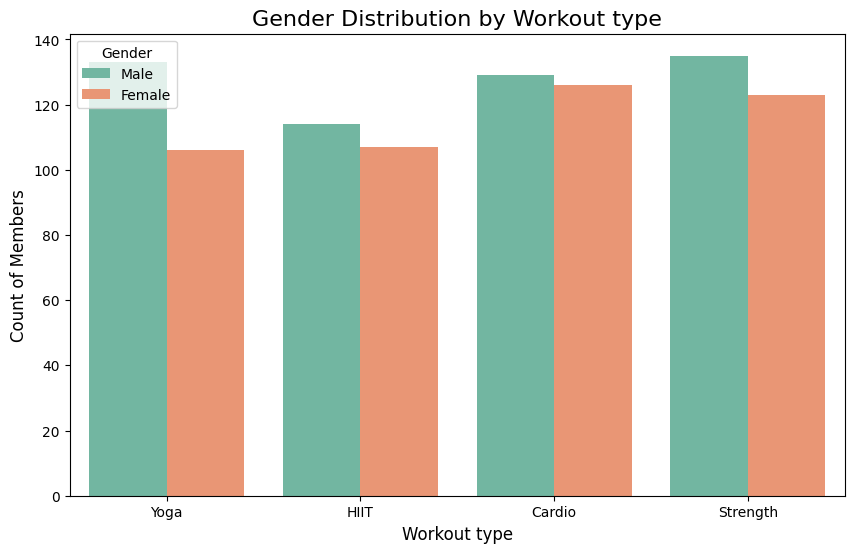

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Workout_Type', hue='Gender', palette='Set2')
plt.title('Gender Distribution by Workout type', fontsize=16)
plt.xlabel('Workout type', fontsize=12)
plt.ylabel('Count of Members', fontsize=12)

# Show the plot
plt.show()

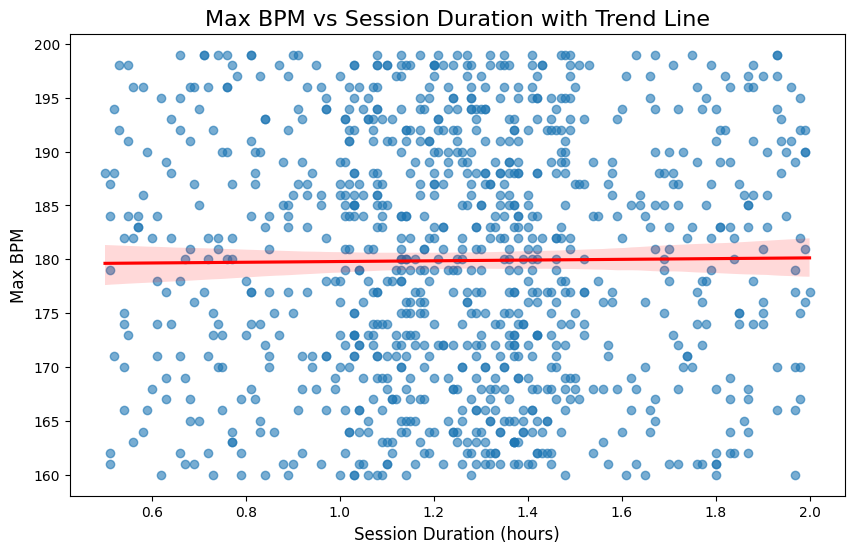

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Session_Duration (hours)', y='Max_BPM', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Max BPM vs Session Duration with Trend Line', fontsize=16)
plt.xlabel('Session Duration (hours)', fontsize=12)
plt.ylabel('Max BPM', fontsize=12)
plt.show()

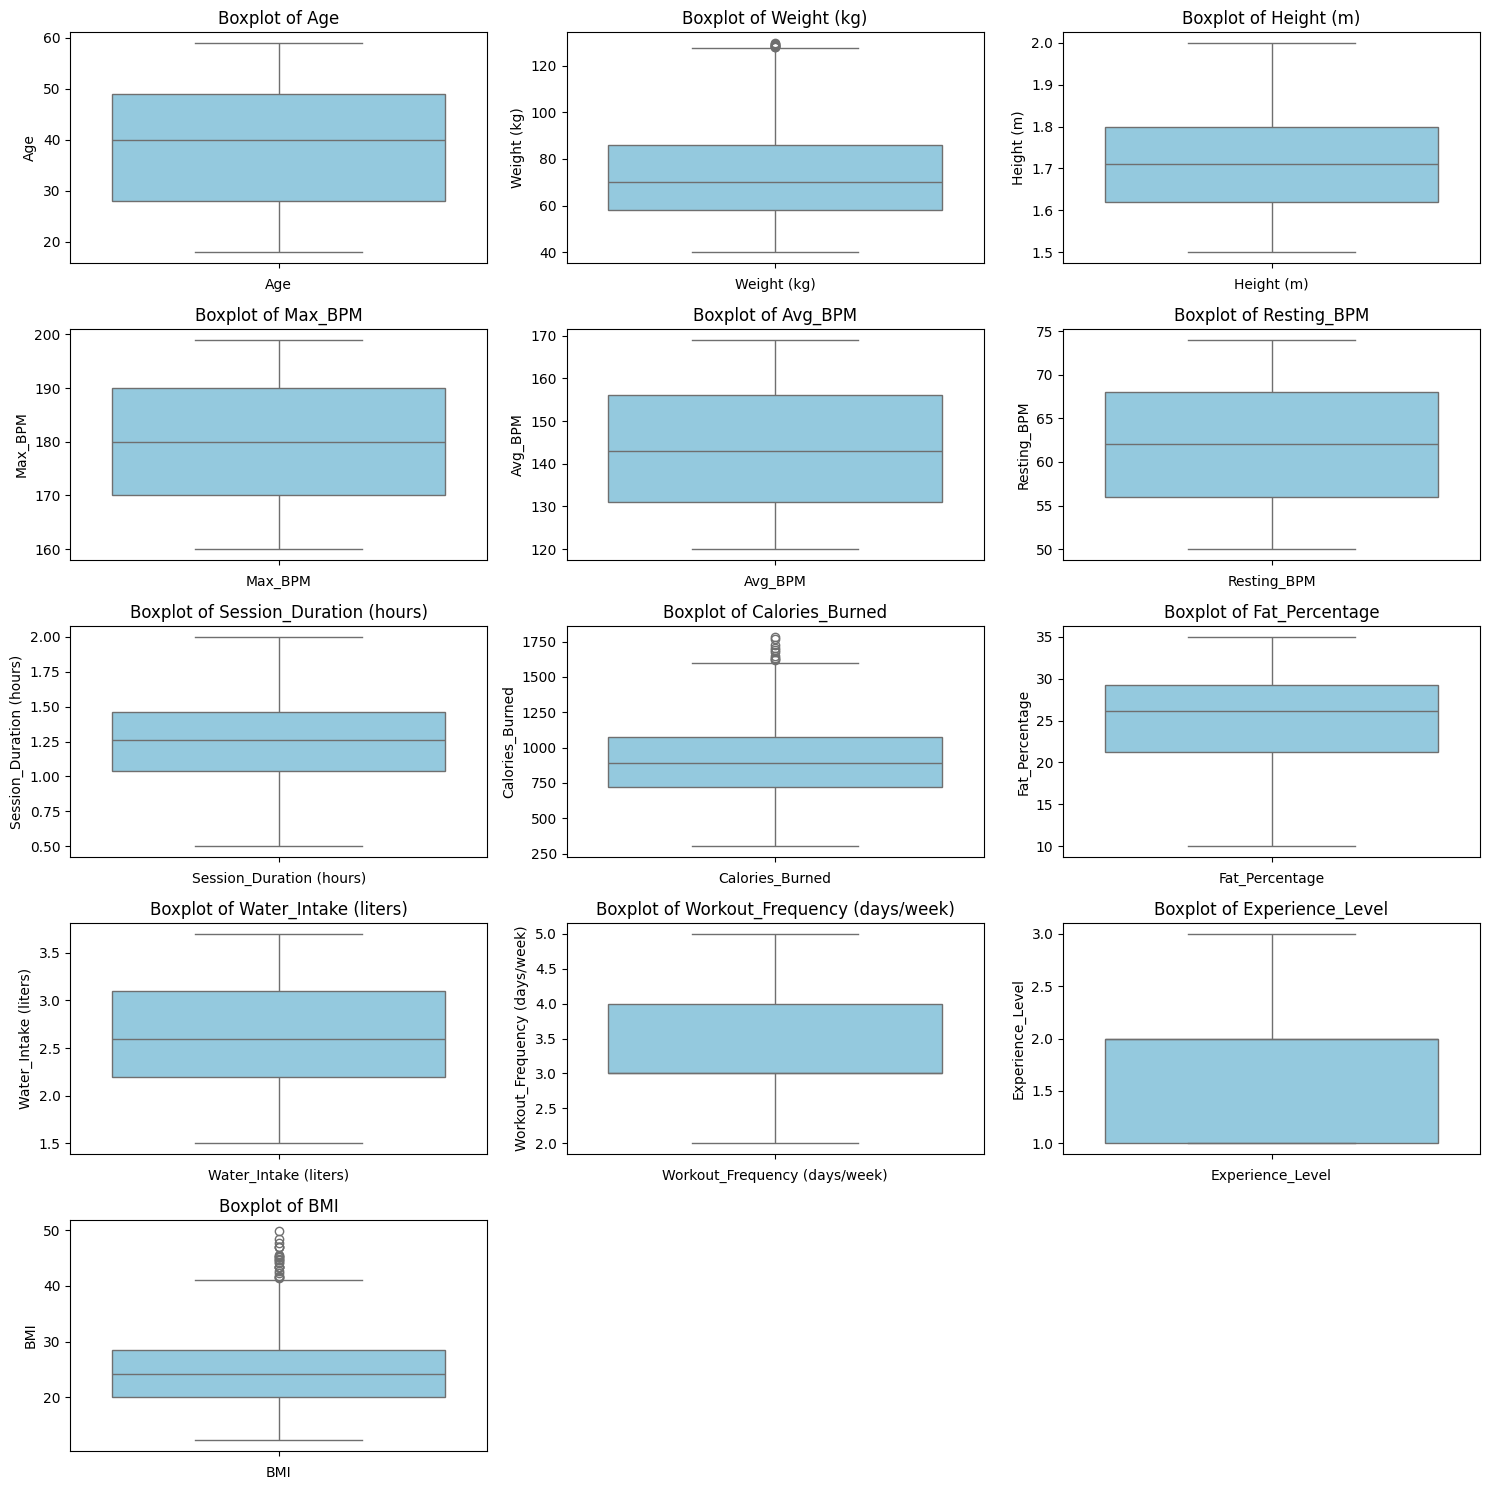

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='skyblue') 
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    # Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
Q1 = df['Calories_Burned'].quantile(0.25)
Q3 = df['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Calories_Burned'] >= lower_bound) & (df['Calories_Burned'] <= upper_bound)]

In [19]:
# Calculate the Z-scores for the 'BMI' column
df['BMI_zscore'] = zscore(df['BMI'])

# Remove rows where the Z-score is greater than 3 or less than -3
df = df[(df['BMI_zscore'] <= 3) & (df['BMI_zscore'] >= -3)]

# Drop the Z-score column since it's not needed anymore
df.drop('BMI_zscore', axis=1, inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12772\2463410287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_zscore'] = zscore(df['BMI'])


In [20]:
# Calculate the Z-scores for the 'Weight (kg)' column
df['Weight_zscore'] = zscore(df['Weight (kg)'])

# Remove rows where the Z-score is greater than 3 or less than -3
df = df[(df['Weight_zscore'] <= 3) & (df['Weight_zscore'] >= -3)]

# Drop the Z-score column since it's not needed anymore
df.drop('Weight_zscore', axis=1, inplace=True)

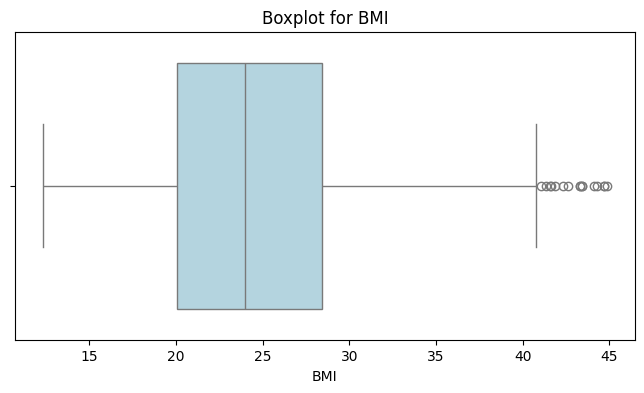

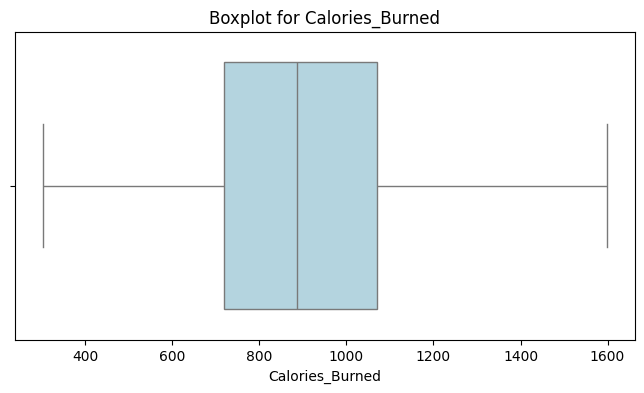

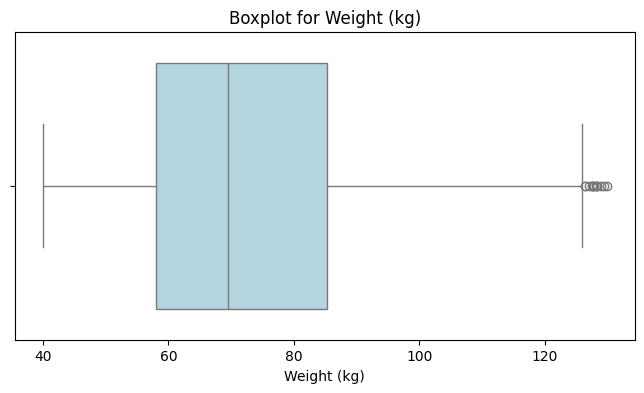

In [21]:
columns_to_check = ['BMI', 'Calories_Burned', 'Weight (kg)']
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot for {column}')
    plt.show()

In [22]:
def categorize_BMI(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30 :
        return 'Overweight'
    else:
        return 'Obese'

In [23]:
df['BMI_Category']=df['BMI'].apply(categorize_BMI)
df['BMI_Category']

0            Obese
1            Obese
2           Normal
3      Underweight
4      Underweight
          ...     
968     Overweight
969     Overweight
970         Normal
971          Obese
972          Obese
Name: BMI_Category, Length: 953, dtype: object

In [24]:
df['Calories_per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
df['Calories_per_Hour']

0      776.923077
1      679.230769
2      609.909910
3      901.694915
4      868.750000
          ...    
968    868.789809
969    913.043478
970    540.116279
971    802.727273
972    722.666667
Name: Calories_per_Hour, Length: 953, dtype: float64

In [25]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

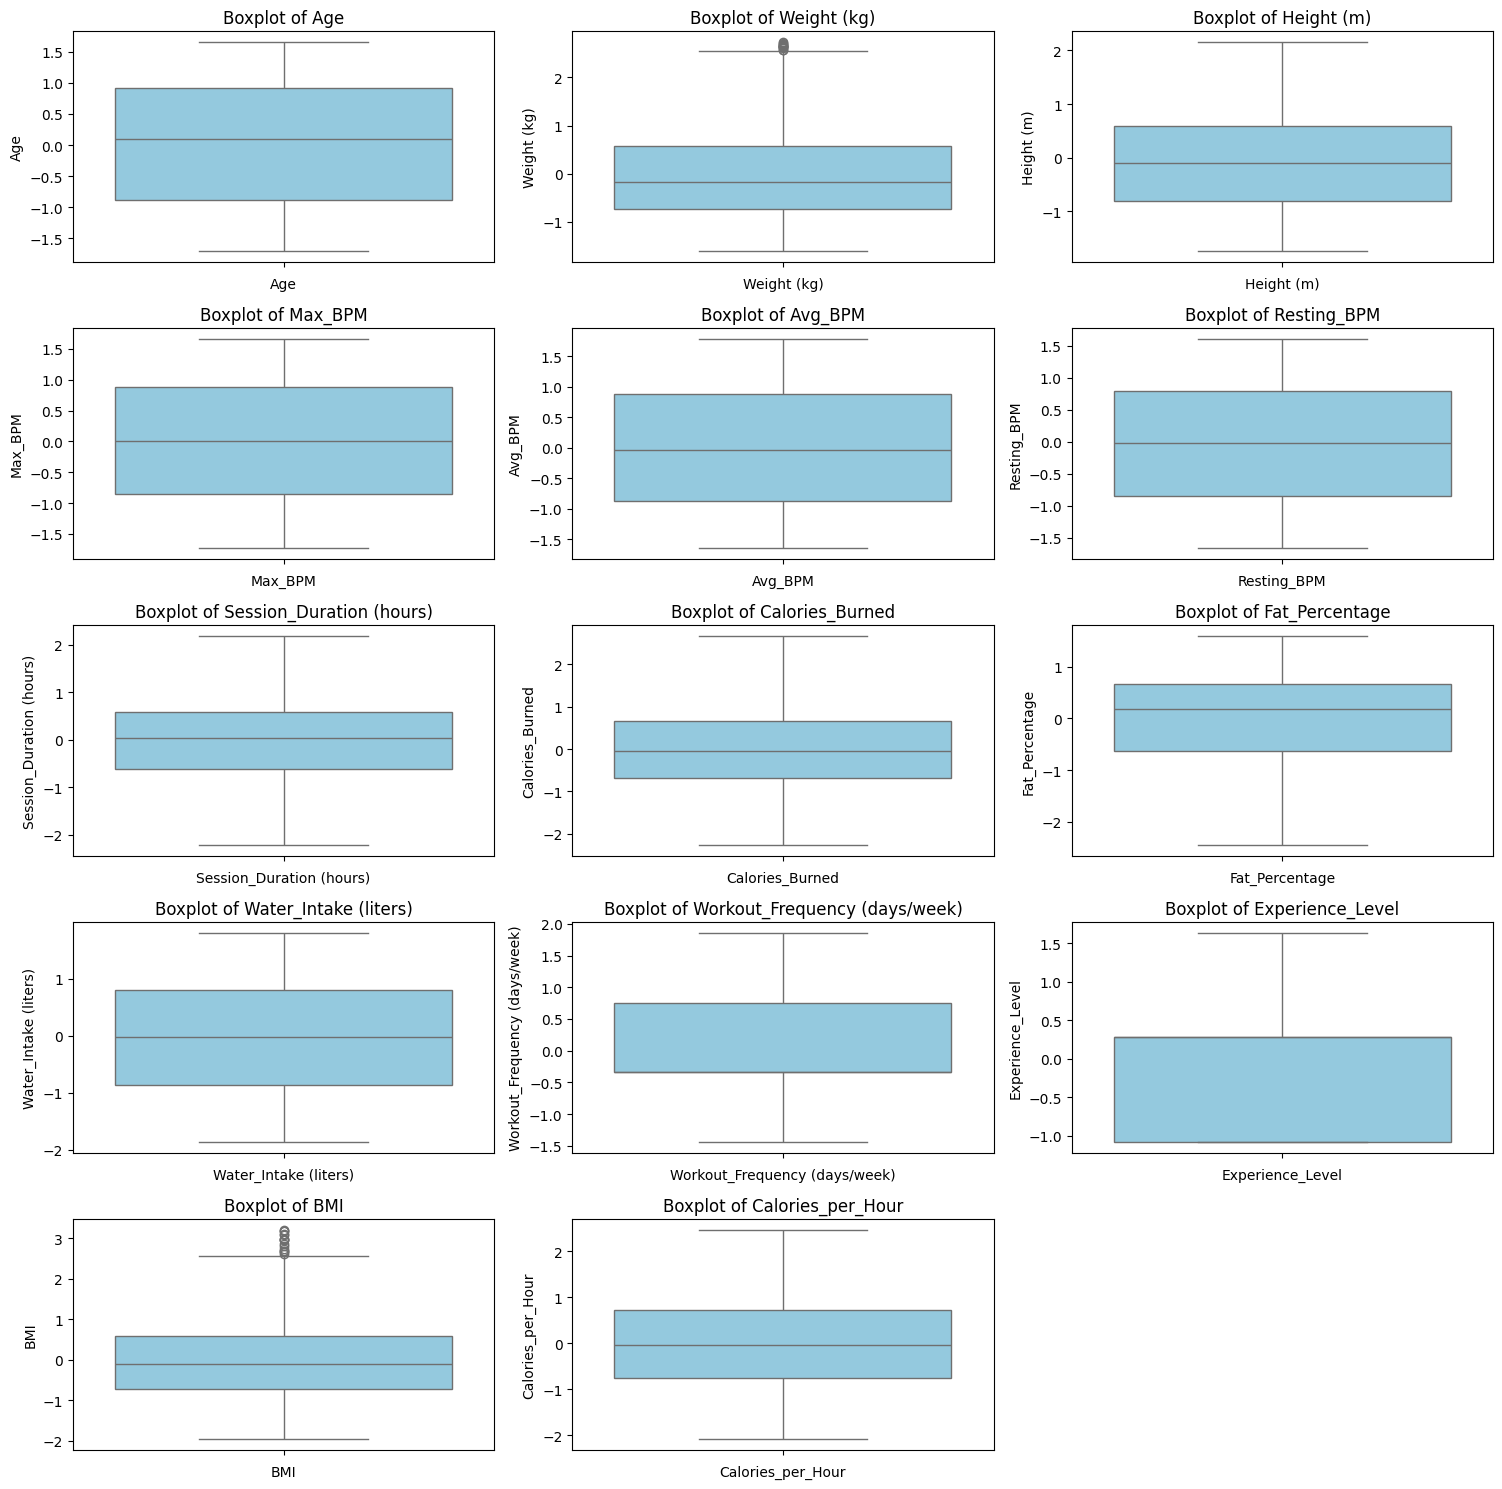

In [26]:
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='skyblue') 
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
df.dtypes

Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                          float64
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
BMI_Category                      object
Calories_per_Hour                float64
dtype: object

In [28]:
categorical_columns = ['Gender', 'Workout_Type','BMI_Category']

In [29]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [30]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BMI_Category,Calories_per_Hour
0,1.415018,1,0.729238,-0.103814,0.009766,0.946264,-0.298350,1.297824,1.586392,3,-2.031118,1.477457,0.758121,1.634367,0.880514,1,0.687630
1,0.593356,0,0.081807,-1.509357,-0.077215,0.525392,0.519467,0.146244,-0.053686,1,1.423411,-0.864776,0.758121,0.275247,1.165981,1,-0.453870
2,-0.556971,0,-0.246740,-0.494243,-1.120980,-1.508826,-1.116167,-0.414782,-0.839398,0,1.342319,-0.530171,0.758121,0.275247,0.009842,0,-1.263860
3,-1.132135,1,-0.966644,-0.181900,0.879570,1.437282,-0.843561,-1.950222,-1.392448,2,0.596271,-0.864776,-0.341558,-1.083873,-0.989291,3,2.145545
4,-0.063974,1,-1.309685,0.520872,0.705609,1.016410,0.792072,-1.802583,-1.300909,2,0.661144,0.306341,-0.341558,-1.083873,-1.626833,3,1.760595


In [31]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BMI_Category,Calories_per_Hour
0,1.415018,1,0.729238,-0.103814,0.009766,0.946264,-0.298350,1.297824,1.586392,3,-2.031118,1.477457,0.758121,1.634367,0.880514,1,0.687630
1,0.593356,0,0.081807,-1.509357,-0.077215,0.525392,0.519467,0.146244,-0.053686,1,1.423411,-0.864776,0.758121,0.275247,1.165981,1,-0.453870
2,-0.556971,0,-0.246740,-0.494243,-1.120980,-1.508826,-1.116167,-0.414782,-0.839398,0,1.342319,-0.530171,0.758121,0.275247,0.009842,0,-1.263860
3,-1.132135,1,-0.966644,-0.181900,0.879570,1.437282,-0.843561,-1.950222,-1.392448,2,0.596271,-0.864776,-0.341558,-1.083873,-0.989291,3,2.145545
4,-0.063974,1,-1.309685,0.520872,0.705609,1.016410,0.792072,-1.802583,-1.300909,2,0.661144,0.306341,-0.341558,-1.083873,-1.626833,3,1.760595


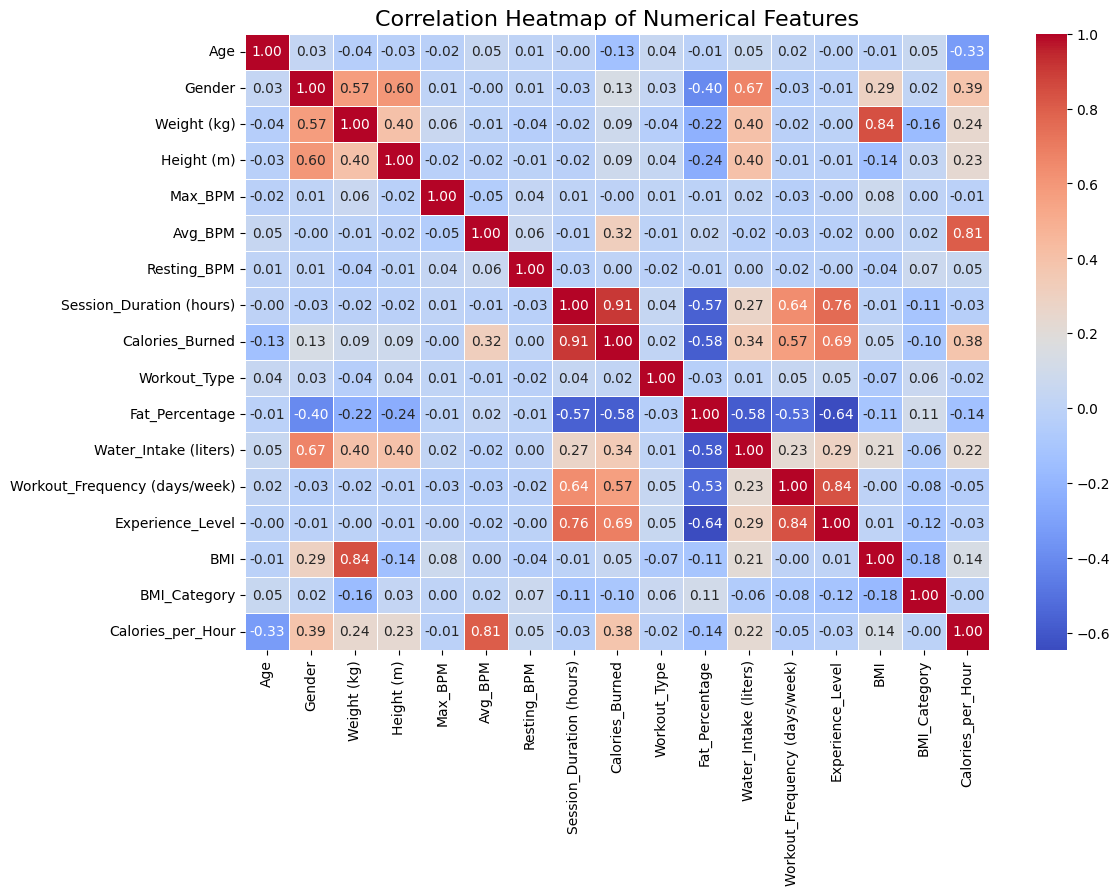

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [35]:
# Define features (X) and target variable (y)
X = df.drop('Calories_Burned', axis=1)  # Replace 'Calories_Burned' with your target column
y = df['Calories_Burned']  # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.005949305071412233
R-squared: 0.9944968399419175


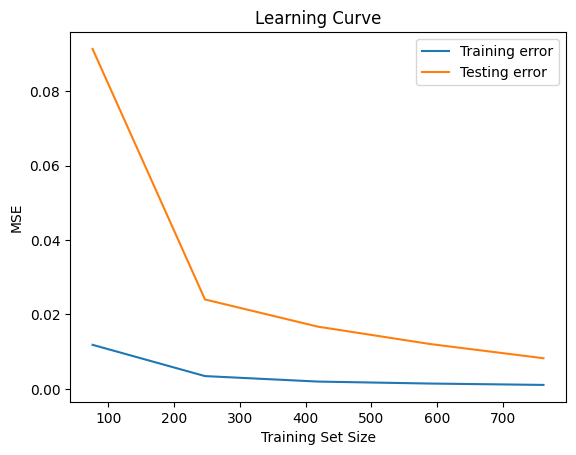

In [39]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Testing error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.08211004541673629
Mean Squared Error: 0.01356135990306391
R² Score: 0.9874556215799997


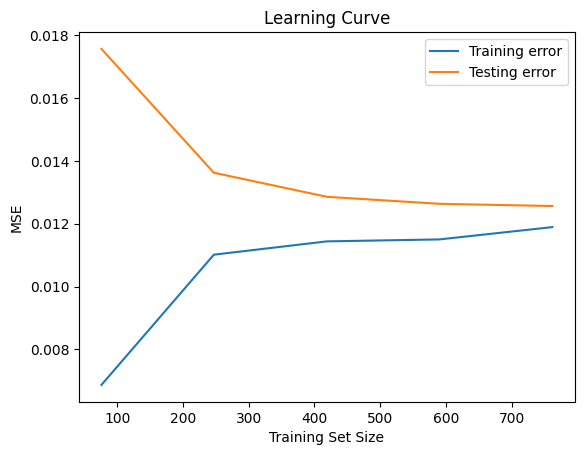

In [51]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Testing error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()